# Abalone Age Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('abalone.csv')
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.shape

(4177, 9)

In [6]:
df.shape

(4177, 9)

In [7]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [8]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [11]:
# Summary of Statistics

df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [12]:
df.Rings.unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [14]:
df.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

# Data Visualisation

In [15]:
# To check the missing values

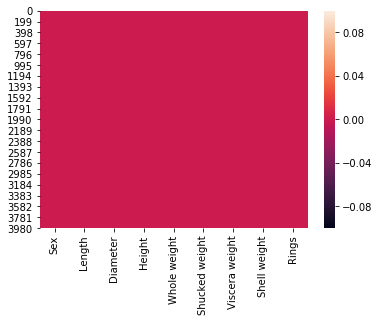

In [16]:
sns.heatmap(df.isnull())

# Checking out the correlation

In [19]:
dfcor=df.corr()
dfcor

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


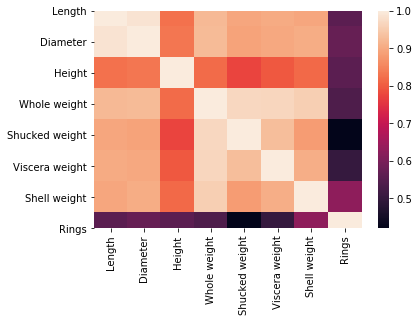

In [20]:
sns.heatmap(dfcor)

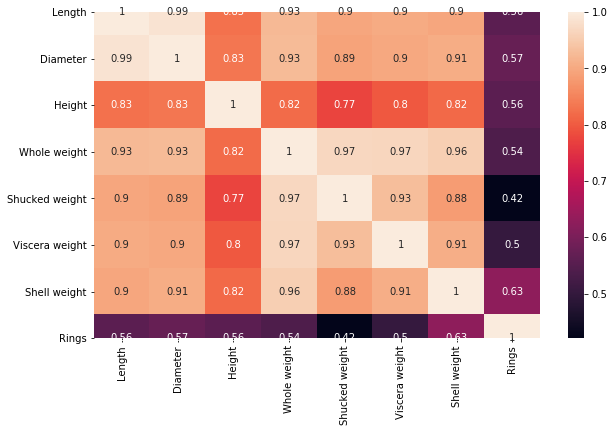

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,annot=True)

# Plotting the outliers

In [22]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

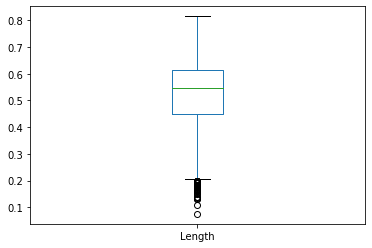

In [24]:
df['Length'].plot.box()

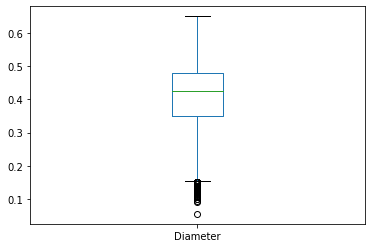

In [25]:
df['Diameter'].plot.box()

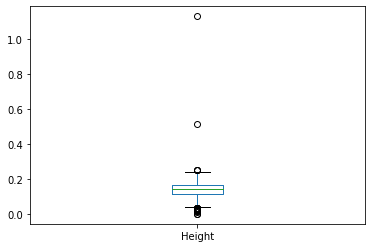

In [26]:
df['Height'].plot.box()

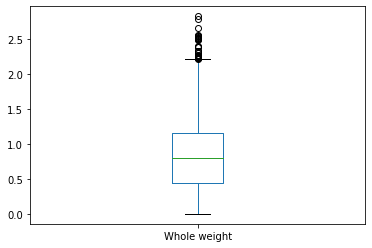

In [27]:
df['Whole weight'].plot.box()

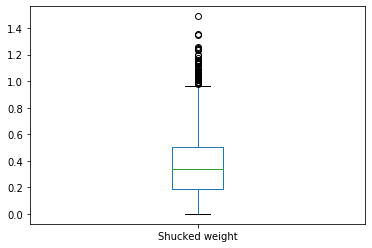

In [29]:
df['Shucked weight'].plot.box()

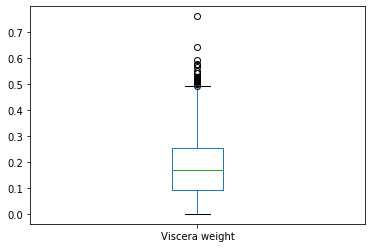

In [31]:
df['Viscera weight'].plot.box()

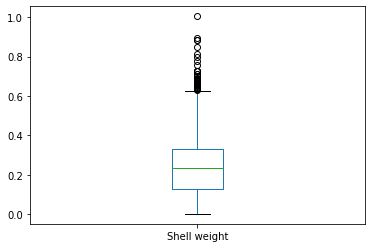

In [32]:
df['Shell weight'].plot.box()

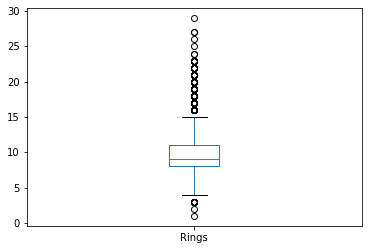

In [33]:
df['Rings'].plot.box()

In [34]:
df.shape

(4177, 9)

# To check the distribution of skewness

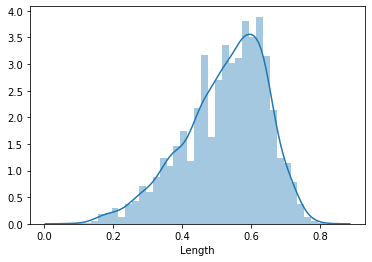

In [35]:
sns.distplot(df['Length'])

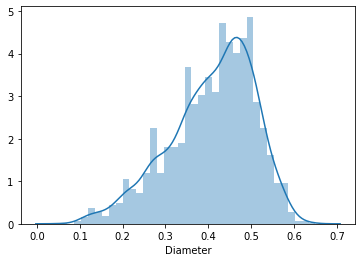

In [37]:
sns.distplot(df['Diameter'])

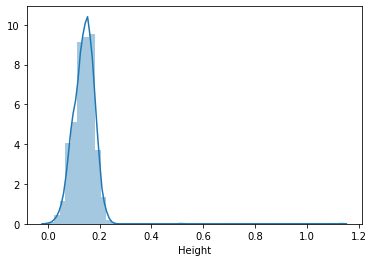

In [38]:
sns.distplot(df['Height'])

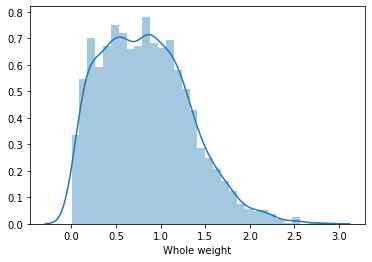

In [39]:
sns.distplot(df['Whole weight'])

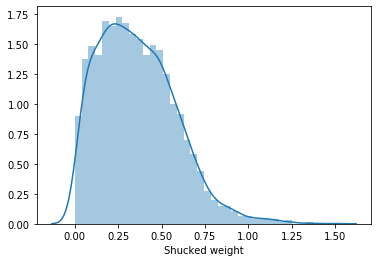

In [40]:
sns.distplot(df['Shucked weight'])

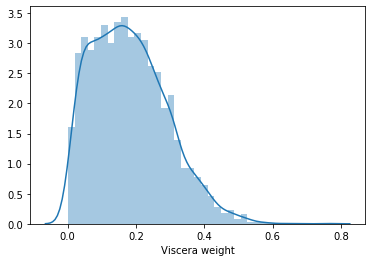

In [41]:
sns.distplot(df['Viscera weight'])

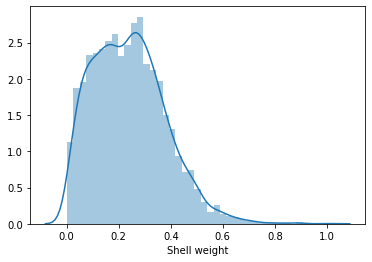

In [42]:
sns.distplot(df['Shell weight'])

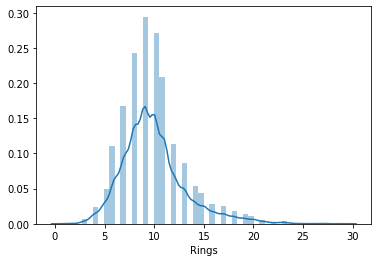

In [43]:
sns.distplot(df['Rings'])

In [47]:
collist=df.columns.values
ncol=12
nrows=10

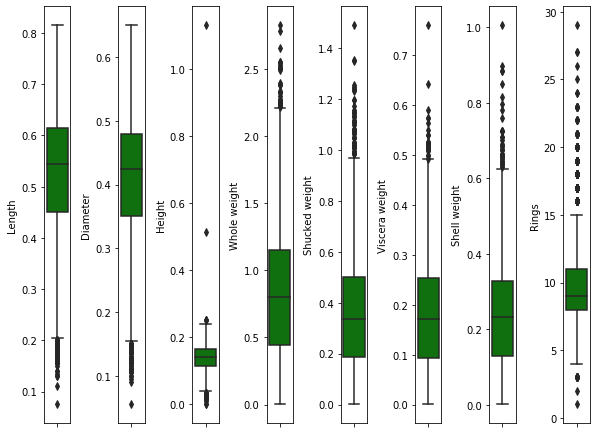

In [48]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

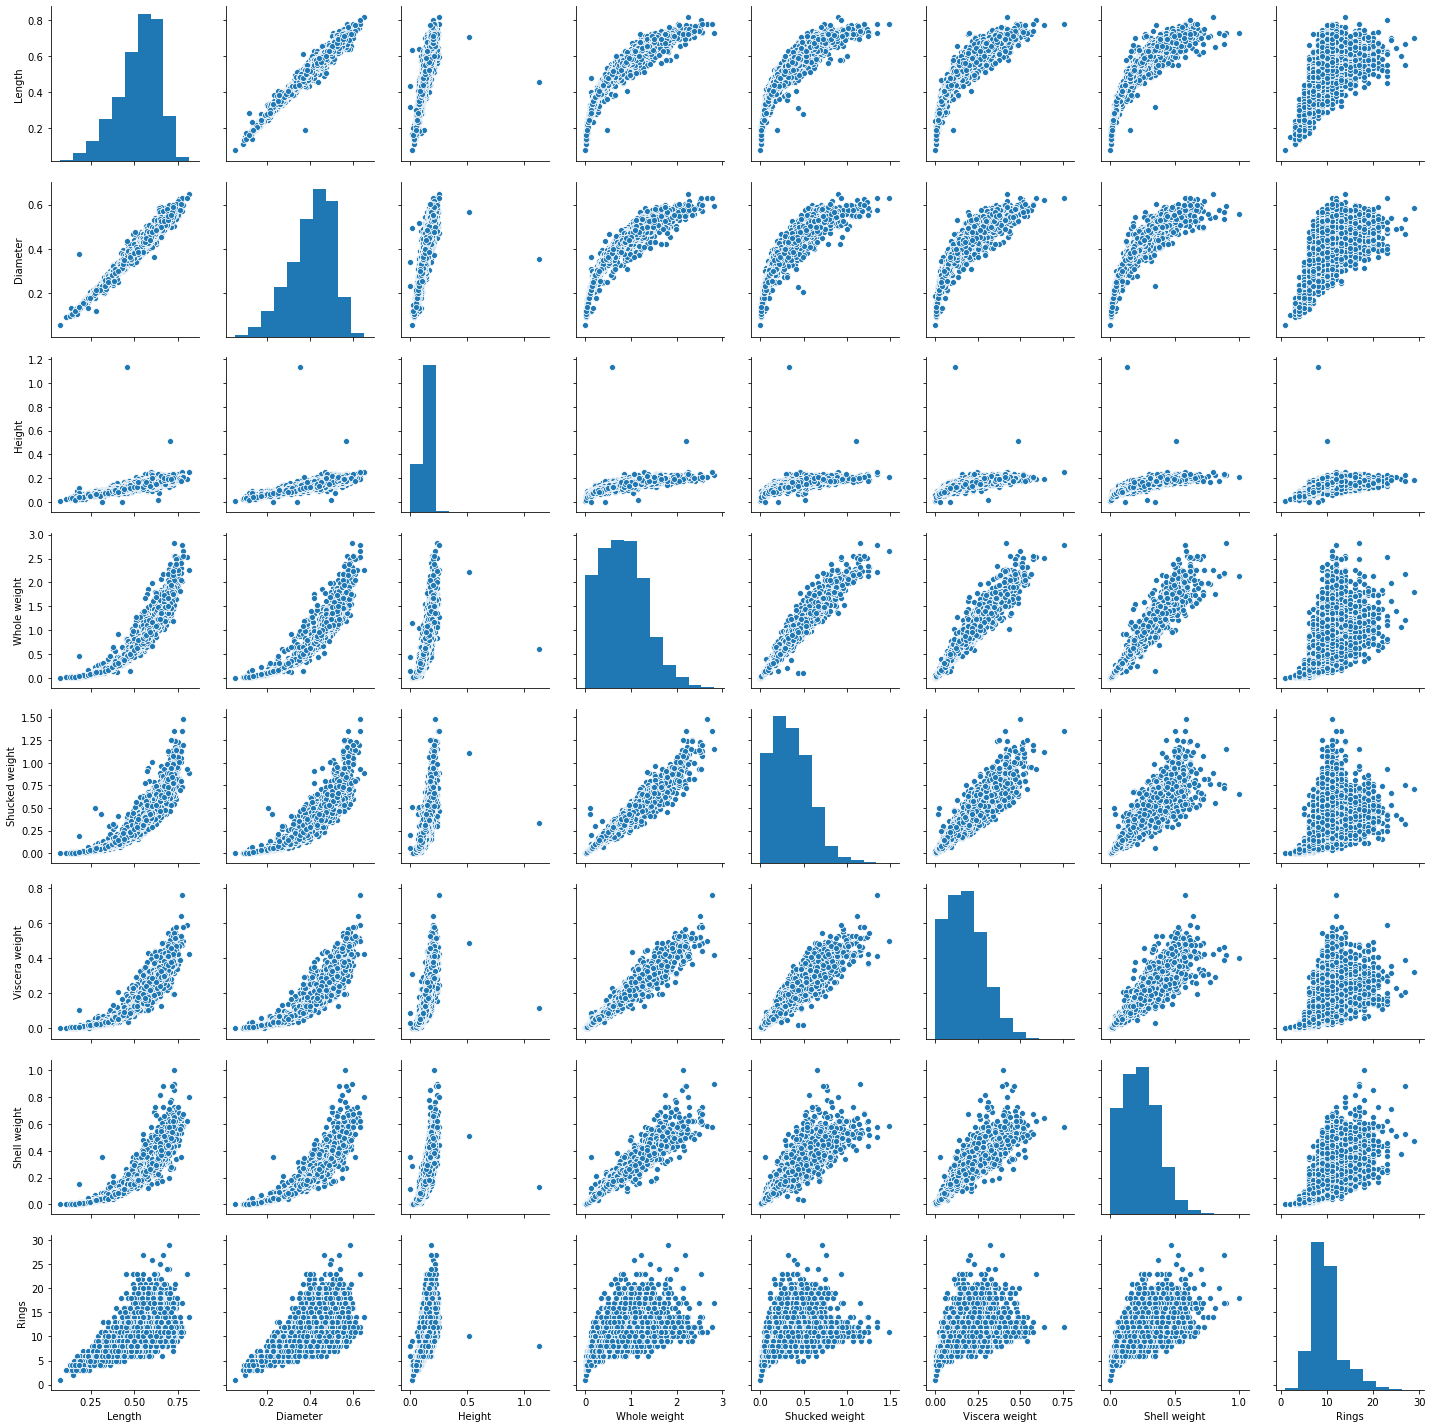

In [50]:
sns.pairplot(df)

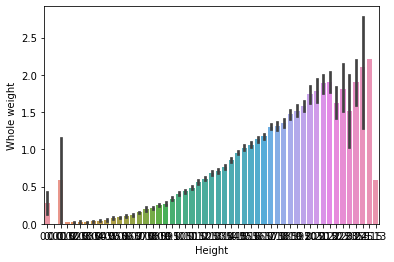

In [51]:
# Height vs whole weight

sns.barplot(x=df['Height'],y=df['Whole weight'],data=df)
plt.show()

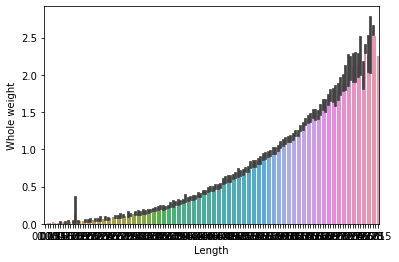

In [52]:
# Length vs whole weight

sns.barplot(x=df['Length'],y=df['Whole weight'],data=df)
plt.show()

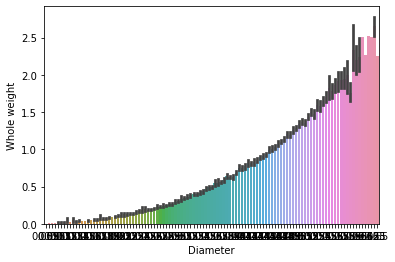

In [53]:
# Diameter vs whole weight

sns.barplot(x=df['Diameter'],y=df['Whole weight'],data=df)
plt.show()


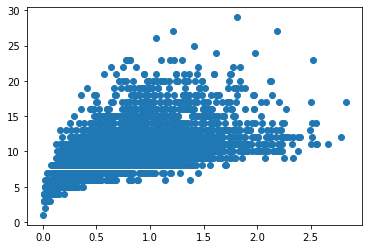

In [56]:
# Whole weight vs rings

plt.scatter(df['Whole weight'],df['Rings'])
plt.show()

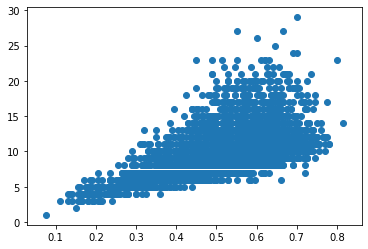

In [57]:
# Length vs rings

plt.scatter(df['Length'],df['Rings'])
plt.show()

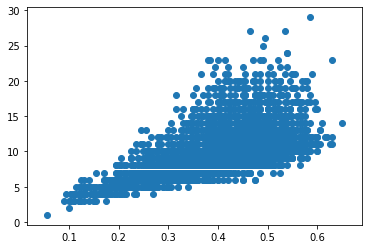

In [58]:
# Diameter vs Rings

plt.scatter(df['Diameter'],df['Rings'])
plt.show()

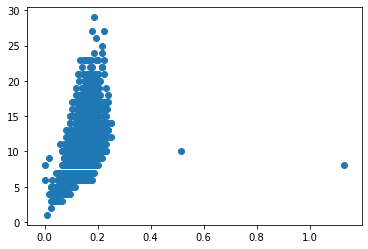

In [59]:
# Height vs Rings

plt.scatter(df['Height'],df['Rings'])
plt.show()

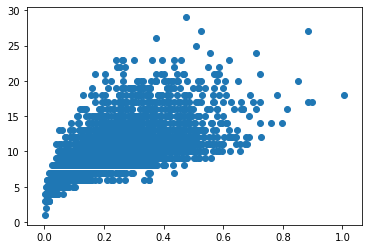

In [62]:
# Shell weight vs Rings

plt.scatter(df['Shell weight'],df['Rings'])
plt.show()

In [63]:
# Data Cleansing:

# Removing the missing values

# Dropping the negatively correlated columns

# Removing the outliers

In [65]:
# Removing the unncessary columns

df.drop('Sex',axis=1,inplace=True)

In [66]:
df.drop('Diameter',axis=1,inplace=True)

In [67]:
df.drop('Whole weight',axis=1,inplace=True)

In [68]:
df.drop('Shucked weight',axis=1,inplace=True)

In [69]:
df.drop('Viscera weight',axis=1,inplace=True)

In [70]:
df.head()

,Length,Height,Shell weight,Rings
0,0.455,0.095,0.150,15
1,0.350,0.090,0.070,7
2,0.530,0.135,0.210,9
3,0.440,0.125,0.155,10
4,0.330,0.080,0.055,7


In [71]:
df.shape

(4177, 4)

# Removing the outliers

In [72]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.57455813, 1.06442415, 0.63821689, 1.57154357],
       [1.44898585, 1.18397831, 1.21298732, 0.91001299],
       [0.05003309, 0.10799087, 0.20713907, 0.28962385],
       ...,
       [0.6329849 , 1.56576738, 0.49695471, 0.28962385],
       [0.84118198, 0.25067161, 0.41073914, 0.02057072],
       [1.54905203, 1.32665906, 1.84048058, 0.64095986]])

In [73]:
threshold=3
print(np.where(z>3))

(array([   6,   72,   81,   83,  129,  163,  164,  165,  166,  166,  167,
        168,  181,  232,  236,  236,  237,  238,  239,  270,  275,  277,
        278,  294,  310,  313,  314,  334,  351,  355,  358,  362,  375,
        416,  417,  428,  431,  433,  469,  478,  480,  501,  526,  530,
        572,  628,  673,  674,  675,  678,  696,  719,  720,  744,  754,
        756,  811,  891, 1207, 1257, 1417, 1428, 1429, 1986, 1987, 2051,
       2090, 2108, 2108, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208,
       2209, 2274, 2275, 2305, 2334, 2335, 2344, 2358, 2368, 2381, 2436,
       2459, 2471, 3008, 3140, 3148, 3149, 3149, 3151, 3151, 3188, 3193,
       3280, 3359, 3715, 3899, 3902, 3924, 3930, 3944, 3996, 4145],
      dtype=int64), array([3, 3, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 0, 1, 0, 0, 0, 3, 3, 2,
       3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 2, 2, 1, 1, 2, 0, 0, 0, 1,
       2, 2, 3, 0, 2, 2, 3, 3, 3, 3

In [74]:
df_new=df[(z<3).all(axis=1)]
df_new

,Length,Height,Shell weight,Rings
0,0.455,0.095,0.1500,15
1,0.350,0.090,0.0700,7
2,0.530,0.135,0.2100,9
3,0.440,0.125,0.1550,10
4,0.330,0.080,0.0550,7
...,...,...,...,...
4172,0.565,0.165,0.2490,11
4173,0.590,0.135,0.2605,10
4174,0.600,0.205,0.3080,9
4175,0.625,0.150,0.2960,10


In [75]:
df.shape

(4177, 4)

In [76]:
df_new.shape

(4073, 4)

In [77]:
# Lets check the skewness of the dataset
df_new.skew()

Length         -0.591294
Height         -0.222971
Shell weight    0.395921
Rings           0.707132
dtype: float64

In [78]:
# there is some skewness which needs to be treated

In [79]:
# Treating using log

for col in df_new.columns:
    if df_new.skew().loc[col]>0.55:
        df_new[col]=np.log1p(df_new[col])

In [80]:
# lets again check the skewness
df_new.skew()

Length         -0.591294
Height         -0.222971
Shell weight    0.395921
Rings          -0.177579
dtype: float64

In [81]:
# Skewness has been reduced

In [82]:
# Separating the target and input values

df_x=df_new.drop(columns=['Rings'])
y=df_new[['Rings']]

In [83]:
# Scaling the input variable
# linear regression algorithm requires all features to be on a common scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [84]:
# Lets again check the skewness
x.skew()

Length         -0.591294
Height         -0.222971
Shell weight    0.395921
dtype: float64

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print('Maximum r2 score corresponding to:',final_r_state,'is:',max_r_score)        
    

Maximum r2 score corresponding to: 77 is: 0.5255301376873771


In [87]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring='r2').mean()

0.3683429114267588

In [88]:
# the below cross validation score is less and and it shows that we need to try out certain more algorithms

In [89]:
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print('r2 score corresponding to:',r_state,'is',r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
            
    print('Maximum r2 score corresponding to:',final_r_state,'is:',max_r_score)
    return final_r_state

In [90]:
# Lets use Linear Regression and check max r2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to: 42 is 0.45235075485649723
r2 score corresponding to: 43 is 0.48426953726302346
r2 score corresponding to: 44 is 0.4869193282909078
r2 score corresponding to: 45 is 0.4767645469834284
r2 score corresponding to: 46 is 0.45602810832380336
r2 score corresponding to: 47 is 0.46289589026891154
r2 score corresponding to: 48 is 0.4575485044187889
r2 score corresponding to: 49 is 0.4386324877222505
r2 score corresponding to: 50 is 0.4389507736417676
r2 score corresponding to: 51 is 0.4608003964470466
r2 score corresponding to: 52 is 0.4869008818777083
r2 score corresponding to: 53 is 0.4917248273481357
r2 score corresponding to: 54 is 0.45365736502740617
r2 score corresponding to: 55 is 0.46465171830826313
r2 score corresponding to: 56 is 0.4648160628091079
r2 score corresponding to: 57 is 0.44220859535527635
r2 score corresponding to: 58 is 0.5096334863464411
r2 score corresponding to: 59 is 0.45740567472401383
r2 score corresponding to: 60 is 0.4586886973257339
r2 s

In [91]:
# Lets use grid_search to find the optimal value of n_neighbors for KNN  model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={'n_neighbors':range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 29}

In [92]:
# Lets use KNN regression and check maximum r2 score corresponding to different random states
knr=KNeighborsRegressor(n_neighbors=29)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to: 42 is 0.5639106102743274
r2 score corresponding to: 43 is 0.5650048652003018
r2 score corresponding to: 44 is 0.5781530904968967
r2 score corresponding to: 45 is 0.558053322804583
r2 score corresponding to: 46 is 0.559966618794117
r2 score corresponding to: 47 is 0.5524288895047373
r2 score corresponding to: 48 is 0.553803932687159
r2 score corresponding to: 49 is 0.5296126783981019
r2 score corresponding to: 50 is 0.5361167205297956
r2 score corresponding to: 51 is 0.5690940510773065
r2 score corresponding to: 52 is 0.5754205014531972
r2 score corresponding to: 53 is 0.5960891267754511
r2 score corresponding to: 54 is 0.568797197849578
r2 score corresponding to: 55 is 0.5612119223526799
r2 score corresponding to: 56 is 0.5664176724112595
r2 score corresponding to: 57 is 0.5382150107450305
r2 score corresponding to: 58 is 0.5971347435772947
r2 score corresponding to: 59 is 0.5650371142487449
r2 score corresponding to: 60 is 0.5417411723194085
r2 score corresp

In [94]:
# Lets check the mean r2 score of both linear regression model and knn regression

print('Mean r2 score for linear regression: ', cross_val_score(lreg,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for Linear Regression:',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())
print()
print('Mean r2 score for KNN Regression:',cross_val_score(knr,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for KNN Regression:',cross_val_score(knr,x,y,cv=5,scoring='r2').std())
# # based on the below output KNN regression is performing better

Mean r2 score for linear regression:  0.37954612356644224
Standard deviation in r2 score for Linear Regression: 0.09168329887282485

Mean r2 score for KNN Regression: 0.502418930028661
Standard deviation in r2 score for KNN Regression: 0.06801611594189187


In [95]:
# Lets check Lasso Regression and the best value of alpha
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.01}

In [96]:
lsreg=Lasso(alpha=0.01)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to: 42 is 0.4491723802853569
r2 score corresponding to: 43 is 0.4800254959350261
r2 score corresponding to: 44 is 0.4831680010484458
r2 score corresponding to: 45 is 0.4728192613158039
r2 score corresponding to: 46 is 0.4531153184298914
r2 score corresponding to: 47 is 0.4607444365383625
r2 score corresponding to: 48 is 0.45773440139040034
r2 score corresponding to: 49 is 0.4386380460836803
r2 score corresponding to: 50 is 0.43836983075897484
r2 score corresponding to: 51 is 0.4580480867497503
r2 score corresponding to: 52 is 0.48069450282800397
r2 score corresponding to: 53 is 0.48763251814428055
r2 score corresponding to: 54 is 0.45498992621356804
r2 score corresponding to: 55 is 0.4594732190410993
r2 score corresponding to: 56 is 0.4633655349444913
r2 score corresponding to: 57 is 0.440956274366777
r2 score corresponding to: 58 is 0.5066694274776375
r2 score corresponding to: 59 is 0.45756293275707427
r2 score corresponding to: 60 is 0.4591784080503116
r2 scor

In [97]:
# Lets use the cross val score with Lasso

print('Mean r2 score for Lasso regression: ', cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for Lasso Regression:',cross_val_score(lreg,x,y,cv=5,scoring='r2').std())


Mean r2 score for Lasso regression:  0.37987086038095297
Standard deviation in r2 score for Lasso Regression: 0.09168329887282485


In [98]:
# Now we will try to use the gradient boosting technique

# For getting the best set of parameters we will use grid search

from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [99]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)
r_state=maxr2_score(gbr,x,y)

r2 score corresponding to: 42 is 0.5710056095014961
r2 score corresponding to: 43 is 0.5756967581658616
r2 score corresponding to: 44 is 0.5851130252047498
r2 score corresponding to: 45 is 0.5637754145241496
r2 score corresponding to: 46 is 0.5656652863933294
r2 score corresponding to: 47 is 0.5586826212998652
r2 score corresponding to: 48 is 0.5572142476044764
r2 score corresponding to: 49 is 0.5372445388073622
r2 score corresponding to: 50 is 0.5454042284981742
r2 score corresponding to: 51 is 0.5841617394365813
r2 score corresponding to: 52 is 0.5784335360724518
r2 score corresponding to: 53 is 0.5975555954717235
r2 score corresponding to: 54 is 0.5581334273289476
r2 score corresponding to: 55 is 0.5753878223937103
r2 score corresponding to: 56 is 0.5818069498571699
r2 score corresponding to: 57 is 0.5392945779588388
r2 score corresponding to: 58 is 0.5973224411379007
r2 score corresponding to: 59 is 0.5660561668662278
r2 score corresponding to: 60 is 0.5599881470044628
r2 score cor

In [100]:
# Now we will use the cross_val_score to check the mean r2 score and standard deviation

print('Mean r2 score for Gradient boosting regression: ', cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for Gradient boosting regression:',cross_val_score(gbr,x,y,cv=5,scoring='r2').std())


Mean r2 score for Gradient boosting regression:  0.5108117713553537
Standard deviation in r2 score for Gradient boosting regression: 0.06883432975055584


In [104]:
# Now we will use the Decision Tree Algorithm
dtr=DecisionTreeRegressor()
r_state=maxr2_score(dtr,x,y)

r2 score corresponding to: 42 is 0.12465276256398339
r2 score corresponding to: 43 is 0.12151485367787762
r2 score corresponding to: 44 is 0.15610014655678928
r2 score corresponding to: 45 is 0.2235448128945524
r2 score corresponding to: 46 is 0.16069091505475652
r2 score corresponding to: 47 is 0.1572398248167367
r2 score corresponding to: 48 is 0.055052930960463486
r2 score corresponding to: 49 is 0.10219483332338064
r2 score corresponding to: 50 is 0.16270742109811254
r2 score corresponding to: 51 is 0.20999139358633068
r2 score corresponding to: 52 is 0.26854213947230166
r2 score corresponding to: 53 is 0.2418090496782328
r2 score corresponding to: 54 is 0.14555208180562773
r2 score corresponding to: 55 is 0.1996613026466929
r2 score corresponding to: 56 is 0.14709420039628174
r2 score corresponding to: 57 is 0.15934164557118335
r2 score corresponding to: 58 is 0.23622077835238442
r2 score corresponding to: 59 is 0.0621407464330791
r2 score corresponding to: 60 is 0.153616123860324

In [105]:
# Now we will use the cross_val_score to check the mean r2 score and standard deviation

print('Mean r2 score for Decision Tree Regression: ', cross_val_score(dtr,x,y,cv=5,scoring='r2').mean())
print('Standard deviation in r2 score for Decision Tree Regression:',cross_val_score(dtr,x,y,cv=5,scoring='r2').std())


Mean r2 score for Decision Tree Regression:  0.06366318456251915
Standard deviation in r2 score for Decision Tree Regression: 0.07909054862311012


In [101]:
# Now lets use the adaboost regression algorithm

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000],'base_estimator':[lreg,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(df_x,y)
clf.best_params_

{'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best'),
 'learning_rate': 0.1,
 'n_estimators': 1000}

In [103]:
ada_reg=AdaBoostRegressor(base_estimator=dtr,learning_rate=0.1,n_estimators=1000)
r_state=maxr2_score(ada_reg,x,y)

r2 score corresponding to: 42 is 0.4666986604153128
r2 score corresponding to: 43 is 0.4820586677537587
r2 score corresponding to: 44 is 0.48340330528816744
r2 score corresponding to: 45 is 0.5054872621312199
r2 score corresponding to: 46 is 0.47363769955548507
r2 score corresponding to: 47 is 0.47867168988484987
r2 score corresponding to: 48 is 0.4442015657666817
r2 score corresponding to: 49 is 0.42518332400511605
r2 score corresponding to: 50 is 0.45444936438856676
r2 score corresponding to: 51 is 0.5045260616051933
r2 score corresponding to: 52 is 0.5169253873075315
r2 score corresponding to: 53 is 0.5283003226620058
r2 score corresponding to: 54 is 0.4846318196688748
r2 score corresponding to: 55 is 0.5206553437042309
r2 score corresponding to: 56 is 0.48158385497172174
r2 score corresponding to: 57 is 0.42005052623587524
r2 score corresponding to: 58 is 0.5188652964782292
r2 score corresponding to: 59 is 0.471340908265532
r2 score corresponding to: 60 is 0.4464604000215606
r2 sco

In [106]:
# We tried all the models and found that Gradient Boosting regression is the best
# Random state corresponding to highest r2 score is 77

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=77,test_size=0.20)
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred=gbr.predict(x_test)

In [107]:
from sklearn.externals import joblib

# Save the model as a pickle in a file

joblib.dump(gbr,'Abalone_gbr.obj')

['Abalone_gbr.obj']

In [108]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [109]:
print('RMSE is:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2 score is:',r2_score(y_test,y_pred))

RMSE is: 0.17342453634130095
r2 score is: 0.6146930133114232
